In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs 
import plotly.tools
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Data Input

In [2]:
news_df = pd.read_csv("uci-news-aggregator.csv")

In [3]:
news_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


# News Headlines Length

In [4]:
headlines_length = news_df['TITLE'].str.len()
print("Average Length: ", headlines_length.mean(), 
      "\nStandard Deviation: ", headlines_length.std(), 
      "\nMax Length: ", headlines_length.max())

Average Length:  56.75082323475033 
Standard Deviation:  81.9006588361839 
Max Length:  28426


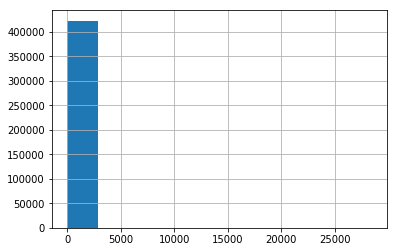

In [5]:
%matplotlib inline
headlines_length.hist()

# Data Imbalance

In [23]:
print("Headlines Count: ", news_df['CATEGORY'].count())

Headlines Count:  422419


In [24]:
x = news_df['CATEGORY'].value_counts()
print(x)

e    152469
b    115967
t    108344
m     45639
Name: CATEGORY, dtype: int64


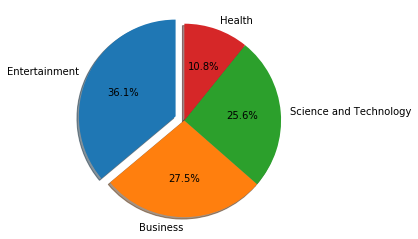

In [31]:
labels = 'Entertainment', 'Business', 'Science and Technology','Health'
explode = (0.1, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(explode=explode, x=x, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Wordcloud

In [46]:
words= news_df['TITLE'].values
print(len(words))

422419


In [61]:
def word_cloud(title, word_list, bg_color, image_path):
    mask=np.array(Image.open(image_path))
    mask=mask[:,:,1]
    plt.figure(figsize=(10,10), dpi=300)
    wc = WordCloud(max_words=300, mask=mask
                 , stopwords=STOPWORDS, max_font_size= 60, collocations=False, random_state=5)
    wc.generate(" ".join(word_list))
    plt.title(title +" - WordCloud", fontsize=24)

    plt.imshow(wc.recolor( colormap='Pastel1_r', random_state=1), alpha=0.96)
    plt.axis('off')
    plt.show()
    plt.close()

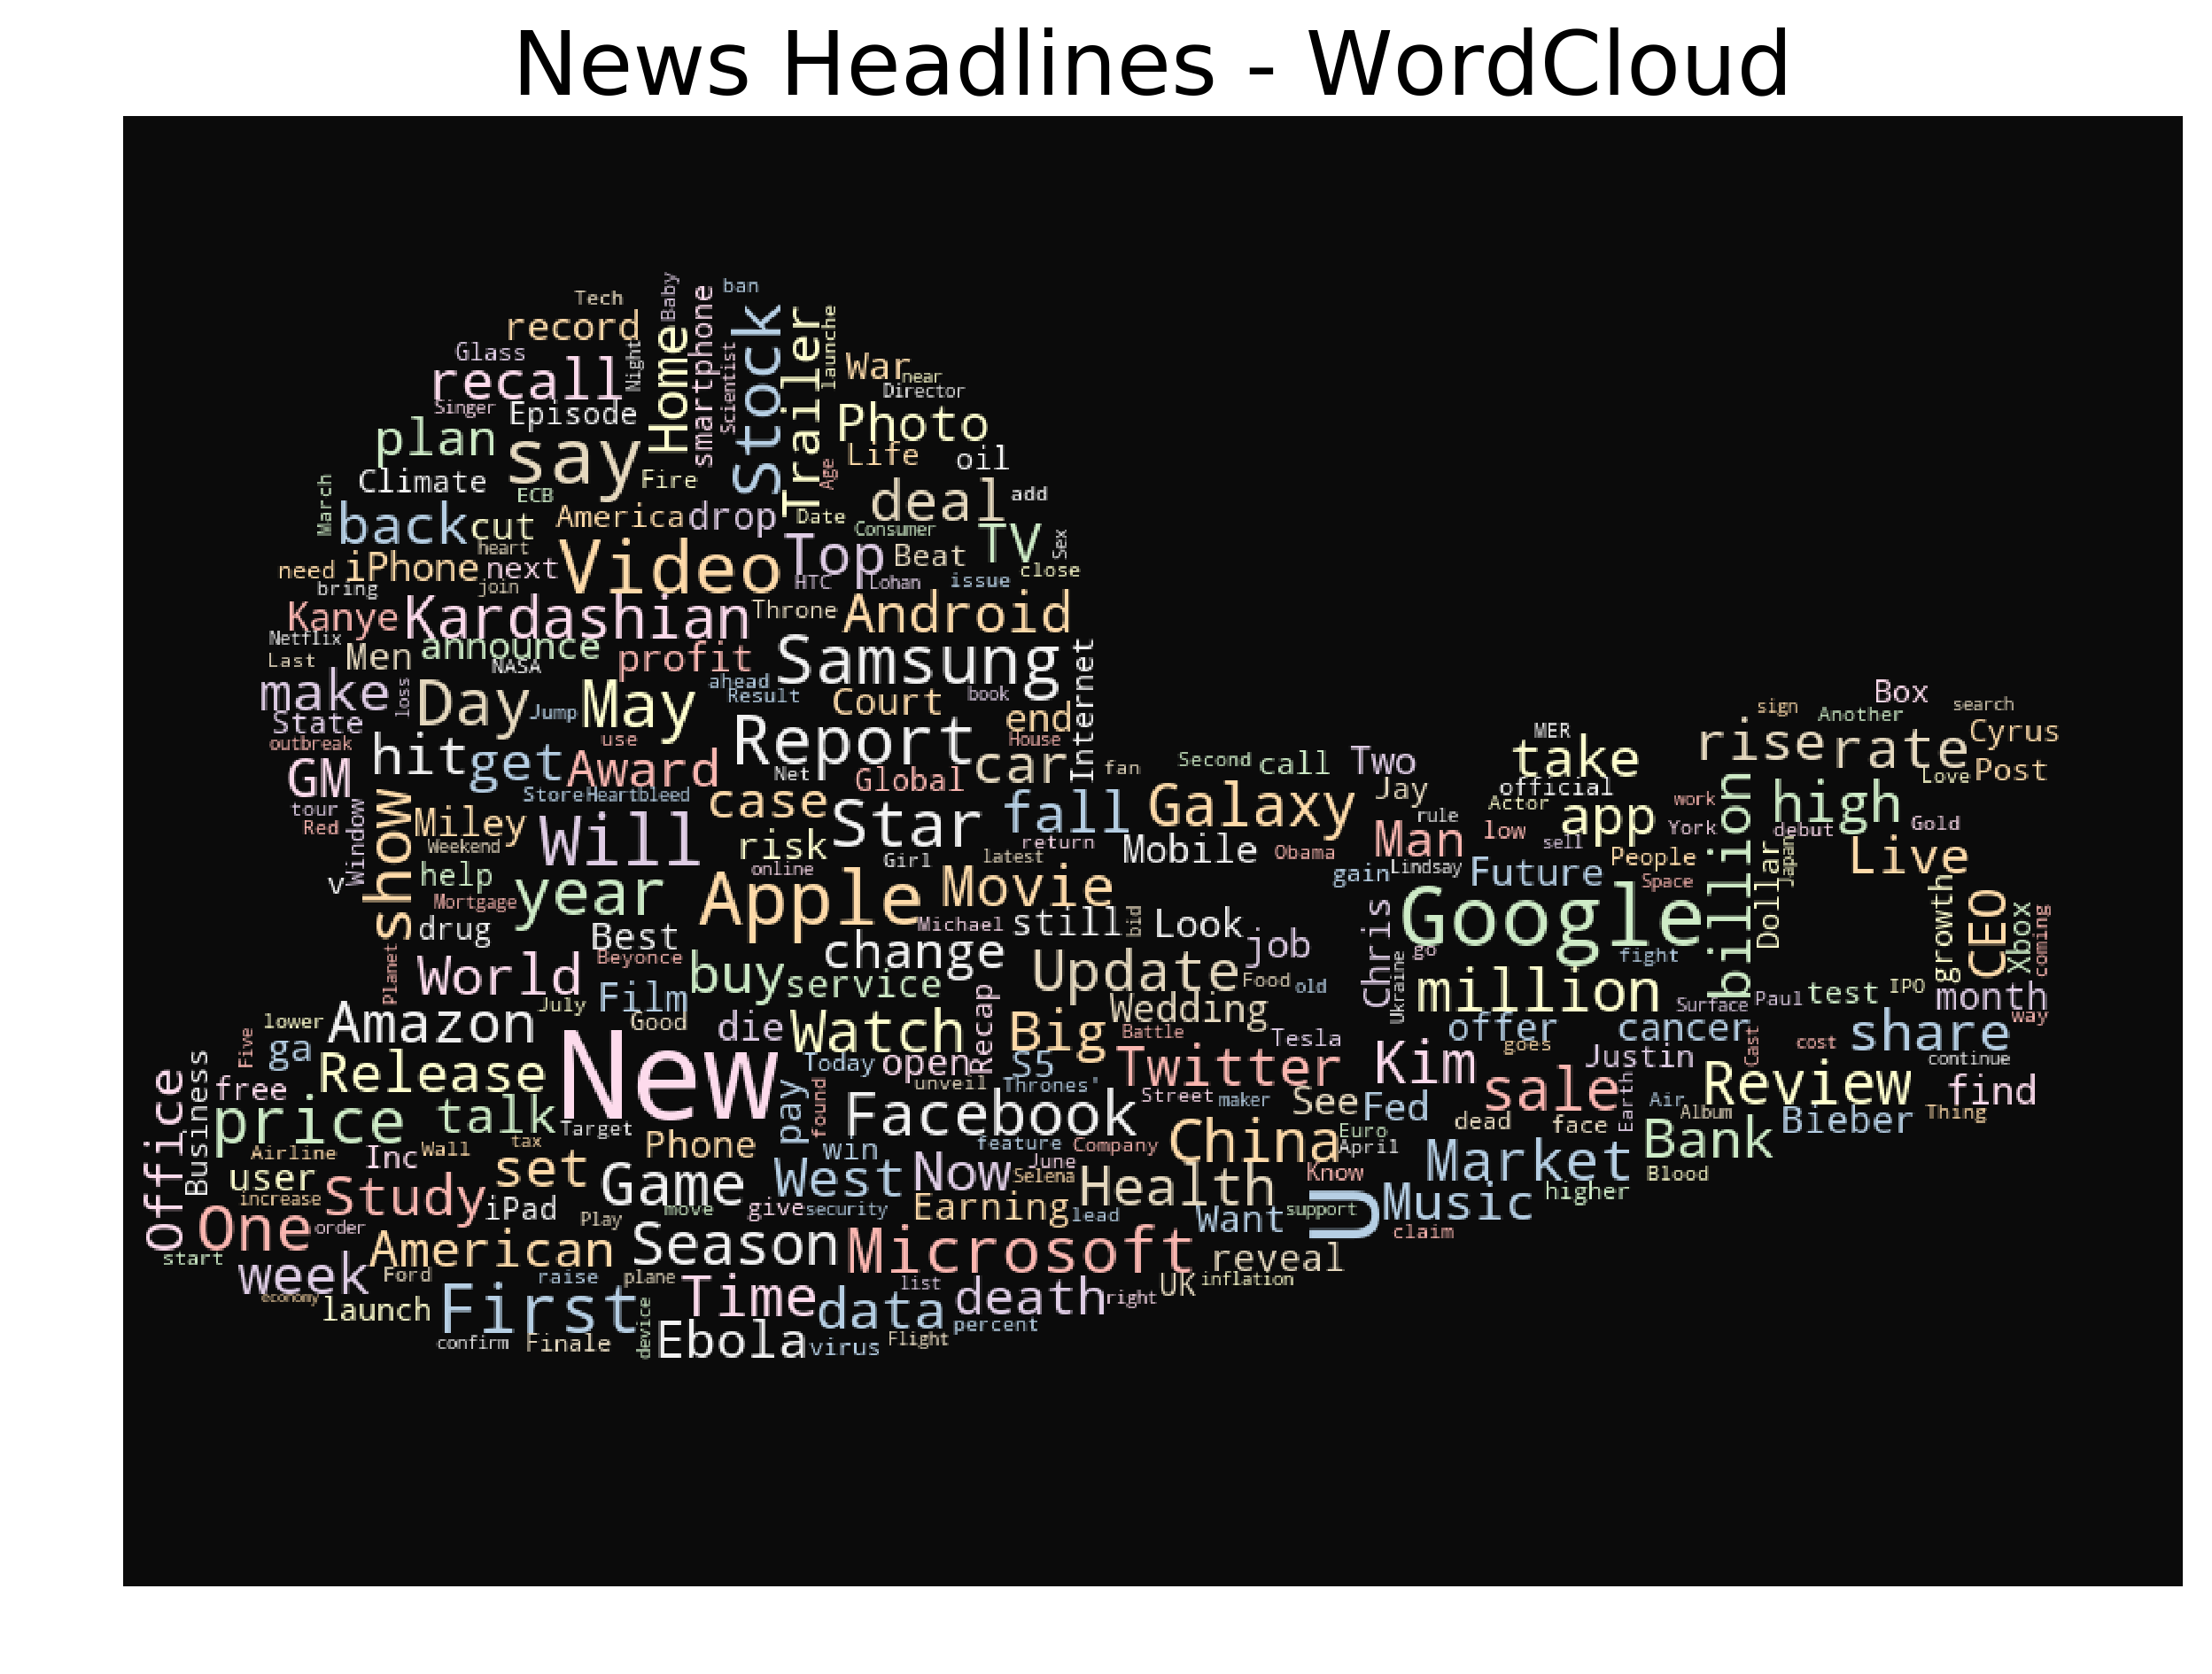

In [63]:
word_cloud(title="News Headlines", word_list=words, bg_color='black', image_path='News-Items.jpg')

# Word Frequency

In [32]:
vocabolary = news_df['TITLE'].str.split(expand=True).unstack().value_counts()

In [36]:
graph = [plotly.graph_objs.Bar(
            x = vocabolary.index.values[0:49],
            y = vocabolary.values[0:49],
            marker = dict(colorscale='Jet', color = vocabolary.values[0:49]),
            text = 'Frequency'
        )]
layout = plotly.graph_objs.Layout(title='Top 50 word counts in the news headlines')

figure = plotly.graph_objs.Figure(data=graph, layout=layout)

py.iplot(figure)